<a href="https://colab.research.google.com/github/ia-nechaev/aqm2022/blob/Changes-to-6/Exercises_Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

We will start working with **continuous random variables and probability distributions** for experiments fulfilling specific conditions.  

A **continous probability distribution** is an equation that connects each possible value of a continous random variable with its probability of occurrence.

Again, we have some **sub-types** of continous random distributions.

##Sub-types
Every sub-type of a random variable is the number of sucesses that result from a particular type of experiment. 


Now, we will work with two other types of experiments to better understand how continuous random variables can be **(3) normal and (4) standardized normally distributed**. This will cover chapter 6 in your book.




#1. Example: Airbnb pricing **(Ivan update this:)**

### 1. Determining if data is normally distributed

### Experimental condition

At random, we would ask 3000 people renting out rooms in Aalborg (zipcome 9000) how much they charge per night on average. 

However, Ivan and I did not want to go out in the rain this week, so we settled for a randomly generated dataset for you instead.

Lets take a look at the pricing data. 

In [20]:
import numpy as np

np.random.seed(1)

# randomly generating a dataset
mu, sigma = 450, 25 

price = np.random.normal(mu, sigma, 3000).astype(int)

price

array([490, 434, 436, ..., 446, 414, 417])

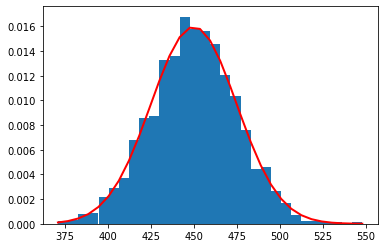

In [15]:
#Now to determine if the dataset is normally distributed, we can a histogram to see if the pricing data is roughly “bell-shaped”, 
#then the data can be assumed to be normally distributed.

import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(price, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [17]:
np.mean(price)

449.86966666666666

In [18]:
np.std(price)

24.861174815809132

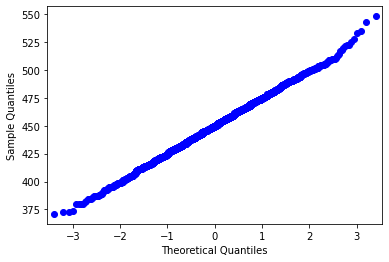

In [24]:
#Now if we want to double-check our data
#We can also test for normalcy by creating a Q-Q plot to see if the data is equally distributed
#If the points on the plot fall roughly along a straight diagonal line, 
#then we typically assume a dataset is normally distributed

import statsmodels.api as sm

#create Q-Q plot 
fig = sm.qqplot(price)

plt.show()

In [27]:
#Now if we want to triple-check our data
#Then we can perform Shapiro-Wilk test to test for normalcy
#If the p-value is higher than 0.05 then we cannot reject the null hypothesis of the Shapiro-Wilk test.
# This means our data is normally distributed 

from scipy.stats import shapiro

shapiro(price)



ShapiroResult(statistic=0.9993359446525574, pvalue=0.3696836531162262)

Now that we have established that our data is normally distributed, we can also assume that the following theoretical conditions apply:

### Theoretical conditions

1. The total area under the normal curve is equal to 1.
2. The distribution is symmetrical around the mean with a single peak
3. The $mean = median = mode$ of the distribution  
4. 50% of the data is below the mean, and 50% is above
5. The normal distribution (regardless of its mean or standard deviation) conforms to the empirical rule (68-95-99.7 rule).
6. Almost all of the area under the bellcurve (99.7%) is within 3 standard deviations from the mean.

##Normal Distribution

$X$ is normally distributed with mean $\mu$ and standard deviation $\sigma$:

 $$X\sim N(\mu, \sigma)$$



 

 



In [ ]:
n 

**Ivan update this with your example (2 standard deviations) from the mean to illustate the use of the empirical rule** 

Now given what we know about out dataset, can we calculate the probability of renting a room out for less than 500kr in Aalborg?

So, we can assume that $X$ = the price in kroner of one night stay is distributed in the following way: 

$$X\sim N(450, 25)$$

Now to find the probability that a rental unit is rented out for a price less than 500 kr in Aalborg.

$$P(X < 500)$$

Here, we can cheat a little and take advantage of the empirical rule (68, 95, 99.7 rule). Do you remember what it is? 



###Lets try it out **(same here)**
**Using the empirical rule** 

So, we know the $\mu = 450$, and $\sigma = 25$. 

This means that $x = 500$ is two standard deviations ($2\sigma$) above the mean. 


The empirical rule states that 95% of all data is within two standard deviations of the mean. 


However, to account for $x$ being below $500$, we take 95% and divide it by 2 = 47.5%, now we have the data to the right of the mean. 


But we need to account for the data below the mean. We know that 50% of all our data is below the mean. 

Ergo, 

$$P(X < 500) = 0.50 + 0.475 = 0.975 $$

In a pinch, where some rough calculations are ok, one can sometimes use the empirical rule.

#Standardised Normal Distribution, Probability and using Z-scores

If we were to evaluate probabiiltes for the normal distribution, there is no formula, instead we use a table of cumulative probabilites for the standard normal distribution.

The standard normal distribution is a very simple normal distribution with a mean of 0 and a standard deviation of 1:
  $$X\sim N(0,1)$$ 
  
We convert the normal distribution to a standard normal distribution to calculate probabilities. Specifically, we calculate a z-score and use a table for z-values to get the cumulative probabilites
*(see page 607 in your book).*

Specifically, Z-score allows for the standardization of all normally distributed data even if the data is scaled differently.  

A z-score is also the number of standard deviations a partular value $x$ is away from $\mu$. 

$$z-score = \frac{x - \mu}{\sigma}$$

###Let's try it out

**Finding the z-score**

Suppose $X\sim N(181, 10)$ represents the normal distribution of male height in cm in Denmark. What is the z-score of x = 200 cm.

$$z = \frac{200 - 181}{10} = 1.90$$

(*To practice, you can go through Exercise 22 - 25, 68, 69 in chapter 6 ).*



**Finding the cumulative probability**

Now given this z-score, can we establish what the probability is of finding a male higher than 2 meters in Denmark? $$P(x > 200)$$

Let's grab the z-score table *(see page 607 in your book).* 

Vertically, we locate 1.9, horizontally we locate 0, because Z is 1.90. 

The cumulative probability we get is 0.9713. Now because we get cumulative probabilites from the table, we need to subtract this cumulative probability from 1.

$$P(x > 200) =1-0.9713 = 0.0287 $$

So 	$\approx$ 3% likelihood of finding a male Dane higher than 2 meters.

(*To practice, you can go through Exercise 50 - 53 in chapter 6 ).*

 **Finding a datapoint x, when we know z**

Now, suppose $X\sim N(181, 10)$ what value of x has a z-score of -3.

Here, we solve for x. 

$$x = \mu + z(\sigma)$$

$$x = 181 -3(10) =151$$

So, we can say that 99.7% of males in Denmark are higher than 151 cm.

(*To practice, you can go through Exercise 15 - 21, 70 in chapter 6 ).*

**Finding the $Kth$ percentile, when we know z**

$$P(x < k) =0.80$$

Here, we first find z. We can look at the table and see which z value equates to 0.80. There we find a z-score of 0.84.

Then we find $x$

$$x = \mu + z(\sigma)$$
$$x = 181 + 0.84(10) = 189.4$$

We can conclude that 80% of all danish males have a height less than 189.4 cm.